# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = 'pictures/lena.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

In [5]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
img_hsv_down = img_hsv.astype("float32")
img_hsv_down[..., -1] = img_hsv_down[..., -1]/255 - change_percentage
img_hsv_down[img_hsv_down[..., -1] < 0] = 0
img_hsv_down[..., -1] = img_hsv_down[..., -1]*255
img_hsv_down = img_hsv_down.astype("uint8")

# 在 HSV color space 增加飽和度
img_hsv_up = img_hsv.astype("float32")
img_hsv_up[..., -1] = img_hsv_up[..., -1]/255 - change_percentage
img_hsv_up[img_hsv_up[..., -1] > 1] = 1
img_hsv_up[..., -1] = img_hsv_up[..., -1]*255
img_hsv_up = img_hsv_up.astype("uint8")

# 轉換 color space 回 BGR
img_hsv_down = cv2.cvtColor(img_hsv_down, cv2.COLOR_HSV2BGR)
img_hsv_up = cv2.cvtColor(img_hsv_up, cv2.COLOR_HSV2BGR)

# 組合圖片 + 顯示圖片
img_hsv_change = np.hstack((img, img_hsv_down, img_hsv_up))
while True:
    cv2.imshow('change saturation', img_hsv_change)
    
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

In [3]:
# case 1
# 每個 channel 個別做直方圖均衡
blue, green, red = cv2.split(img)
histblue = cv2.equalizeHist(blue)
histgreen = cv2.equalizeHist(green)
histred = cv2.equalizeHist(red)
equalHist_by_channel = [histblue, histgreen, histred]

# 組合經過直方圖均衡的每個 channel
img_bgr_equal = cv2.merge(equalHist_by_channel)

# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hsv[..., 2] = cv2.equalizeHist(img_hsv[..., 2]) # equalize hue channel
img_hsv_equal = img_hsv
img_hsv_equal = cv2.cvtColor(img_hsv_equal, cv2.COLOR_HSV2BGR)

# 組合圖片 + 顯示圖片
img_bgr_equalHist = np.hstack((img, img_bgr_equal, img_hsv_equal))
while True:
    # 比較 (原圖, BGR color space 對每個 channel 做直方圖均衡, HSV color space 對明度做直方圖均衡)
    cv2.imshow('bgr equal histogram', img_bgr_equalHist)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

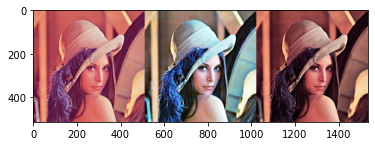

In [6]:
# 顯示結果圖
img_bgr_equalHist_tmp = cv2.cvtColor(img_bgr_equalHist, cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr_equalHist_tmp)

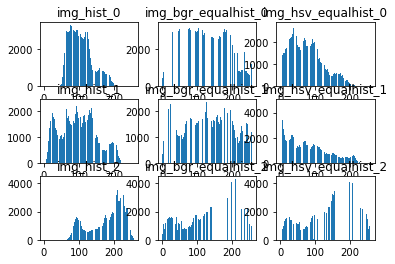

In [28]:
# 顯示histogram直方圖
hist_img_0 = cv2.calcHist([img], [0], None, [256], [0, 256]) # return like [[...], [...], [...], ...]
hist_img_0 = [i[0] for i in hist_img_0]
hist_img_1 = cv2.calcHist([img], [1], None, [256], [0, 256]) # return like [[...], [...], [...], ...]
hist_img_1 = [i[0] for i in hist_img_1]
hist_img_2 = cv2.calcHist([img], [2], None, [256], [0, 256]) # return like [[...], [...], [...], ...]
hist_img_2 = [i[0] for i in hist_img_2]

hist_img_bgr_equal_0 = cv2.calcHist([img_bgr_equal], [0], None, [256], [0, 256]) # return like [[...], [...], [...], ...]
hist_img_bgr_equal_0 = [i[0] for i in hist_img_bgr_equal_0]
hist_img_bgr_equal_1 = cv2.calcHist([img_bgr_equal], [1], None, [256], [0, 256]) # return like [[...], [...], [...], ...]
hist_img_bgr_equal_1 = [i[0] for i in hist_img_bgr_equal_1]
hist_img_bgr_equal_2 = cv2.calcHist([img_bgr_equal], [2], None, [256], [0, 256]) # return like [[...], [...], [...], ...]
hist_img_bgr_equal_2 = [i[0] for i in hist_img_bgr_equal_2]

hist_img_hsv_equal_0 = cv2.calcHist([img_hsv_equal], [0], None, [256], [0, 256]) # return like [[...], [...], [...], ...]
hist_img_hsv_equal_0 = [i[0] for i in hist_img_hsv_equal_0]
hist_img_hsv_equal_1 = cv2.calcHist([img_hsv_equal], [1], None, [256], [0, 256]) # return like [[...], [...], [...], ...]
hist_img_hsv_equal_1 = [i[0] for i in hist_img_hsv_equal_1]
hist_img_hsv_equal_2 = cv2.calcHist([img_hsv_equal], [2], None, [256], [0, 256]) # return like [[...], [...], [...], ...]
hist_img_hsv_equal_2 = [i[0] for i in hist_img_hsv_equal_2]

plt.subplot(3,3,1), plt.title('img_hist_0')
plt.bar(range(1, 257), hist_img_0)
plt.subplot(3,3,2), plt.title('img_bgr_equalhist_0')
plt.bar(range(1, 257), hist_img_bgr_equal_0)
plt.subplot(3,3,3), plt.title('img_hsv_equalhist_0')
plt.bar(range(1, 257), hist_img_hsv_equal_0)

plt.subplot(3,3,4), plt.title('img_hist_1')
plt.bar(range(1, 257), hist_img_1)
plt.subplot(3,3,5), plt.title('img_bgr_equalhist_1')
plt.bar(range(1, 257), hist_img_bgr_equal_1)
plt.subplot(3,3,6), plt.title('img_hsv_equalhist_1')
plt.bar(range(1, 257), hist_img_hsv_equal_1)

plt.subplot(3,3,7), plt.title('img_hist_2')
plt.bar(range(1, 257), hist_img_2)
plt.subplot(3,3,8), plt.title('img_bgr_equalhist_2')
plt.bar(range(1, 257), hist_img_bgr_equal_2)
plt.subplot(3,3,9), plt.title('img_hsv_equalhist_2')
plt.bar(range(1, 257), hist_img_hsv_equal_2)
plt.show()

## 調整對比 / 明亮

In [12]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
img = cv2.imread("pictures/Basic_Linear_Transform_Tutorial_linear_transform_correction.jpg")
add_contrast = cv2.convertScaleAbs(img, alpha=2.0, beta=0)
add_lighness = cv2.convertScaleAbs(img, alpha=1.0, beta=100)

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))
while True:
    # 比較不同程度的對比 / 明亮
    cv2.imshow('adjust contrast and brighness', img_contrast_light)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

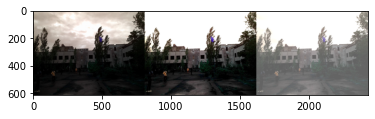

In [11]:
# 顯示結果圖
img_contrast_light_tmp = cv2.cvtColor(img_contrast_light, cv2.COLOR_BGR2RGB)
plt.imshow(img_contrast_light)

In [34]:
# 補充: gamma correction
# ref: https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html
gamma = 0.4
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
img_gamma = cv2.LUT(img, lookUpTable)

# 組合圖片 + 顯示圖片
img_contrast_gamma = np.hstack((img, img_gamma))
while True:
    # 比較不同程度的對比 / 明亮
    cv2.imshow('adjust gamma correction', img_contrast_gamma)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

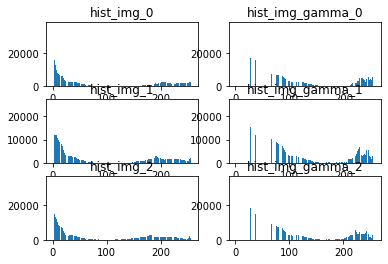

In [30]:
# 顯示histogram直方圖
hist_img_0 = cv2.calcHist([img], [0], None, [256], [0, 256]) # return like [[...], [...], [...], ...]
hist_img_0 = [i[0] for i in hist_img_0]
hist_img_1 = cv2.calcHist([img], [1], None, [256], [0, 256]) # return like [[...], [...], [...], ...]
hist_img_1 = [i[0] for i in hist_img_1]
hist_img_2 = cv2.calcHist([img], [2], None, [256], [0, 256]) # return like [[...], [...], [...], ...]
hist_img_2 = [i[0] for i in hist_img_2]

hist_img_gamma_0 = cv2.calcHist([img_gamma], [0], None, [256], [0, 256]) # return like [[...], [...], [...], ...]
hist_img_gamma_0 = [i[0] for i in hist_img_gamma_0]
hist_img_gamma_1 = cv2.calcHist([img_gamma], [1], None, [256], [0, 256]) # return like [[...], [...], [...], ...]
hist_img_gamma_1 = [i[0] for i in hist_img_gamma_1]
hist_img_gamma_2 = cv2.calcHist([img_gamma], [2], None, [256], [0, 256]) # return like [[...], [...], [...], ...]
hist_img_gamma_2 = [i[0] for i in hist_img_gamma_2]

plt.subplot(3,2,1), plt.title('hist_img_0')
plt.bar(range(1, 257), hist_img_0)
plt.subplot(3,2,2), plt.title('hist_img_gamma_0')
plt.bar(range(1, 257), hist_img_gamma_0)
plt.subplot(3,2,3), plt.title('hist_img_1')
plt.bar(range(1, 257), hist_img_1)
plt.subplot(3,2,4), plt.title('hist_img_gamma_1')
plt.bar(range(1, 257), hist_img_gamma_1)
plt.subplot(3,2,5), plt.title('hist_img_2')
plt.bar(range(1, 257), hist_img_2)
plt.subplot(3,2,6), plt.title('hist_img_gamma_2')
plt.bar(range(1, 257), hist_img_gamma_2)
plt.show()